# Classification

## 1. Classification as a prototype of machine learning technique

One typical example of machine learning is the classification problem. This is the process of attributing a "**class**" (or equivalently, a "**label**") to an object of an arbitrary type (e.g. a string, an image, or numbers) in order to catalogue it based on its **properties** (the actual information that we pass to the machine, e.g. the pixel intensities in the case of an image).

<center>
    <img src="images/classification.png" width=500><br>
    Figure 1 Schematic classification in a 2D plot.<br>
(Credit: <a href="https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d">Supervised vs. Unsupervised Learning, by Devin Soni</a>
</center>

### 1.1. Types of Classifications

Classification can come in two major flavors, based on the type of intervention by the user:

- **Unsupervised** | The classification is defined "unsupervised" when the user does not provide labels during the training process and the machine learns the definition of each class from the data. This is exactly the case of "Clustering" that we saw in the previous session.  

>    _In practice, the machine learns to cluster objects with similar properties._


- **Supervised** | The classification is defined "supervised" when the user provides a label for each object in the training set. In this case, the idea is that we can train the model to associate the label with some given characteristics of the training data.

>    _In practice, the machine learns to find similarities between objects with the same label._

In the reminder, we will only focus on the latter type.

### 1.2. Supervised classification - generative / discriminative classification

One approach to the classification problem involves the recognition of the function describing the density distribution of each class in the parameter space. This type of problem is called **generative classification** because it implies that we can find the distribution from which the data are generated (or better said, sampled).

**Discriminative classification** instead, includes any method which separates classes by "drawing" a boundary in the parameter space.

In Bayesian terms, generative classifiers model the joint probability (the likelihood **P(D|θ)**) while discriminative classifiers model the conditional probability (the posterior **P(θ|D)**) starting from the prior (**P(θ)**).

## 2. Classification algorithms overview

We start by presenting a set of [**sklearn**](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) algorithms with toy datasets, and then describe some of them. 

This serves as a showcase of the available methods and how they compare. You can easily adapt any of these methods to the following examples or your own problems. 

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


In [ ]:
# Generate toy dataset

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]


In [ ]:
# Setting up the classification algorithms (parameters)

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [ ]:
# Running and plotting

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into train and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

### Some comments


depedning on the datasets some classifiers perform better than others (eg linear whentheyr are linear )
some are faster


## 2. The sample for our classification example

In this example we are using a set of photometric measurements (from optical to mid-IR bands) for a sample of massive evolved stars in the Large Magellanic Cloud (based on these works: [Bonanos et al. (2009) AJ, 138, 1003](https://ui.adsabs.harvard.edu/abs/2009AJ....138.1003B/abstract), [Neugent et al. (2012), ApJ, 749, 177](https://ui.adsabs.harvard.edu/abs/2012ApJ...749..177N/abstract), and [Davies, Crowther & Beasor (2018), MNRAS, 478, 313](https://ui.adsabs.harvard.edu/abs/2018MNRAS.478.3138D/abstract)). 
 _For a fully developed classifier based on this idea check maravelias+2022._

Our aim is to **build a classifier** that will be able to **distinguish different classes** of objects. For our purposes we will use OBA stars, OBAe (a subcategory of OBA stars with circumstellar disks and emission lines), Wolf-Rayet stars (hot evolved stars with strong stellar winds that actually strip their envelopes), Yellow and Red supergiants (evolved massive stars). For convenience we will use OBA, OBAe, WR, YSG, and RSG as labels.

![HRD](images/Massey2013-HRD.png)
(A modified version of Fig. XX by [Massey et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013NewAR..57...14M/abstract))


## 2.1 Load and examine data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

&#9755; genfromtxt is very powerful (without the need of pandas) - Additional points here? 

In [2]:
dfile = "data/LMC_phot_data.csv"
miss_value = -999.0  # when entries are missing

data = np.genfromtxt(dfile, dtype=None, 
                     comments='#', delimiter=',', 
                     filling_values = miss_value, 
                     names=True, autostrip='Yes',
                     unpack=True )
#examine data
print("Let us see what we have:\n")
print("The column names:")
print(data.dtype.names)
print("-"*25)
print("Let's print the spectral types only:")
print(data['SpT'])
print("-"*25)

Let us see what we have:

The column names:
('Name', 'RAJ2000', 'DEJ2000', 'U', 'e_U', 'B', 'e_B', 'V', 'e_V', 'I', 'e_I', 'J', 'e_J', 'H', 'e_H', 'K', 'e_K', '36', 'e_36', '45', 'e_45', '58', 'e_58', '80', 'e_80', '24', 'e_24', 'SpT')
-------------------------
Let's print the spectral types only:
[b'WR' b'OBAe' b'OBA' ... b'YSG' b'YSG' b'YSG']
-------------------------


/home/grigoris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


Now we want to group the different spectral classes found and keep their indeces (so that we cna easily select them later on).

In [3]:
from collections import defaultdict

classes = defaultdict(list)

for i in range(0,len(data['SpT'])): 
#    print(i, data['SpT'][i].decode('utf-8'))
    classes[data['SpT'][i].decode('utf-8')].append(i)

#print(classes)
unique_cls = sorted(set(classes.keys()))
print(unique_cls)
print("> SUMMARY of loaded data:")
print("=========================")
for sptype in unique_cls:
    number = len(classes[sptype])
    print(f"{sptype:-<6s}--> {number:>3} stars")

['OBA', 'OBAe', 'RSG', 'WR', 'YSG']
> SUMMARY of loaded data:
OBA-----> 370 stars
OBAe---->  73 stars
RSG-----> 297 stars
WR------>  91 stars
YSG-----> 208 stars


In [4]:
bands = [b for b in data.dtype.names[3:-1] if 'e_' not in b]

def reminder():
    """ 
    A simple function to print all bands
    and classes available.
    """
    print('Available bands to use: ')
    print(','.join(bands))
    print('-'*25)
    print('Available classes to use:')
    print(','.join(unique_cls))

In [5]:
from astropy.table import Table, Column

print(f'Available photometry for: {", ".join(bands)}')     

# Constructing the table for the statistics 
phot_data_col_names = ['Class', 'All'] + [bb for bb in bands]
phot_data_per = Table( names = phot_data_col_names, dtype = ['S3']+['i4']+['f2']*(len(bands)))

for spt in unique_cls:
    indcs = classes[spt]
    starsWbands = defaultdict(list) # keep those with measurements across all
    for star in indcs:
#        print(spt, star)
        for bnd in bands:
            mag = data[star][bnd]
#            print(mag)
            if mag!=miss_value:
                starsWbands[bnd].append(star)    
    row_data_per = [spt, len(indcs)] + [(len(starsWbands[bb])/len(indcs))*100 for bb in bands]
    phot_data_per.add_row ( row_data_per )
    
print("\nNumber of stars per band (in %)\n")
phot_data_per    

Available photometry for: U, B, V, I, J, H, K, 36, 45, 58, 80, 24

Number of stars per band (in %)



Class,All,U,B,V,I,J,H,K,36,45,58,80,24
bytes4,int32,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16,float16
OBA,370,77.3,78.94,78.94,73.5,96.5,97.56,97.0,99.2,97.8,93.5,60.28,2.703
OBAe,73,94.5,94.5,94.5,91.75,94.5,95.9,91.75,98.6,98.6,80.8,61.66,19.17
RSG,297,88.2,99.3,99.3,95.94,100.0,99.7,100.0,98.6,98.3,98.3,99.0,99.3
WR,91,85.7,87.94,87.94,83.5,91.2,93.44,90.1,97.8,98.9,94.5,72.5,4.395
YSG,208,95.7,100.0,100.0,85.56,100.0,100.0,100.0,100.0,100.0,100.0,95.7,100.0


&#9755; 36, 45, 58, 89, 24 corresponds to the 3.6um, 4.5um, 5.8um, 8.9um, 24um bands of *Spitzer*. One common representation of these bands is [3.6], [4.5], [5.8], [8.0], [24] but the use of "[]" and "." is unconvenient, so we totally drop them. 

### Q. What do you notice here ?

many sources come without information across all bands this might be a problem...(we can face this by taking means of other sources or more sophisticated approached but that is more technical)

### 2.1 Visualize data - select features

In [6]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [7]:
def selmags( band1, band2, cls):
    """
    Function to select sources of a specific
    spectral class (cls) and return the magnitudes
    that correspond to bands 1 and 2.
        """
    # all indeces of the particular class
    cls_indcs = np.asarray( classes[cls] ) 
    # selecting those indeces of the class
    # that do not contain missing values, ie -999
    sel_cls_indcs = np.where( (data[band1][cls_indcs]!=miss_value)
                        & (data[band2][cls_indcs]!=miss_value) )[0]

    sel_indcs = cls_indcs[sel_cls_indcs]
    rem_indcs = len(cls_indcs)-len(sel_indcs)
    print(f'-- {cls}: excluding {rem_indcs} out of {len(cls_indcs)} sources ({rem_indcs/len(cls_indcs)*100:.1f}%)')
    mag1, mag2 = data[band1][sel_indcs], data[band2][sel_indcs]    
    
    return mag1, mag2

- plot1:
-- OBA: excluding 88 out of 370 sources (23.8%)
-- OBAe: excluding 8 out of 73 sources (11.0%)
-- RSG: excluding 2 out of 297 sources (0.7%)
-- WR: excluding 15 out of 91 sources (16.5%)
-- YSG: excluding 0 out of 208 sources (0.0%)

- plot2:
-- OBA: excluding 364 out of 370 sources (98.4%)
-- OBAe: excluding 60 out of 73 sources (82.2%)
-- RSG: excluding 4 out of 297 sources (1.3%)
-- WR: excluding 88 out of 91 sources (96.7%)
-- YSG: excluding 0 out of 208 sources (0.0%)


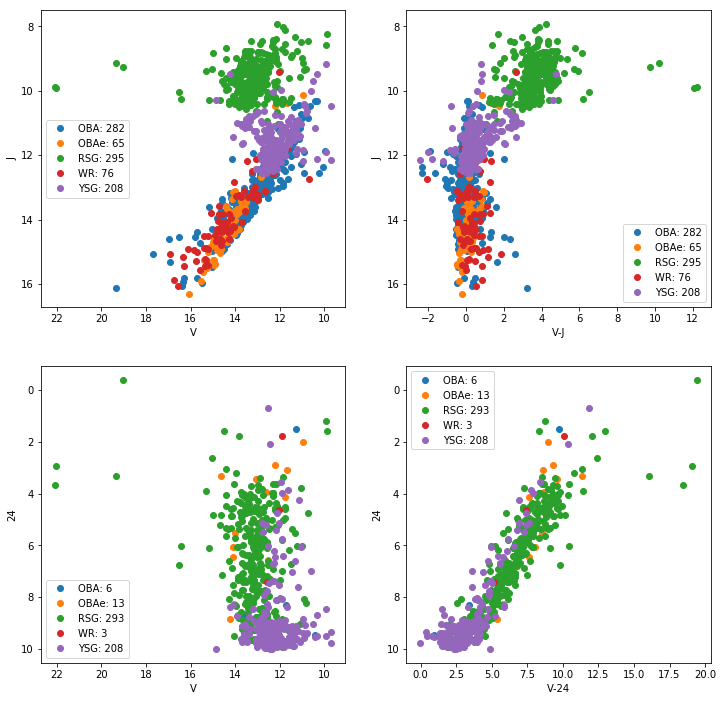

In [8]:
fig, ax = plt.subplots(2,2, figsize=(12, 12))

selected_spt = unique_cls              # if you want to print all
#selected_spt = ['RSG', 'OBA', 'WR']     # put your selection here

# plot 1
band1_1 = 'V'
band1_2 = 'J'

# plot 2
band2_1 = 'V'
band2_2 = '24'

print('- plot1:')
for s in selected_spt: 
    plt1 = selmags( band1_1, band1_2, s)

    ax[0,0].plot(plt1[0], plt1[1], 'o', label=f'{s}: {len(plt1[0])}')
    ax[0,0].set_xlabel(f'{band1_1}') #'-{band1_2}')
    ax[0,0].set_ylabel(band1_2)
    ax[0,0].invert_yaxis()
    ax[0,0].invert_xaxis()
    ax[0,0].legend()

    ax[0,1].plot(plt1[0]-plt1[1], plt1[1], 'o', label=f'{s}: {len(plt1[0])}')
    ax[0,1].set_xlabel(f'{band1_1}-{band1_2}')
    ax[0,1].set_ylabel(band1_2)
    ax[0,1].invert_yaxis()
    ax[0,1].legend()
    
    
print()
print('- plot2:')        
for s in selected_spt:
    plt2 = selmags( band2_1, band2_2, s)
    ax[1,0].plot(plt2[0], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
    ax[1,0].set_xlabel(f'{band2_1}') #'-{band2_2}')
    ax[1,0].set_ylabel(band2_2)
    ax[1,0].invert_yaxis()
    ax[1,0].invert_xaxis()    
    ax[1,0].legend()
    
    ax[1,1].plot(plt2[0]-plt2[1], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
    ax[1,1].set_xlabel(f'{band2_1}-{band2_2}')
    ax[1,1].set_ylabel(band2_2)
    ax[1,1].invert_yaxis()
    ax[1,1].legend()
    

plt.show()

### Q. Play around with the combinations and try to answer:

- Which colors separate best the classes ? For how many classes you can achieve that? 
- What happens if you start increasing the number of classes to consider ?
- How the selection of bands influence the objects to keep ? 
- Would you prefer to use  combinations with few or more objects ?


## 3. Support Vector Machine (SVM)

Support vector machine (SVM) is a way of choosing a decision boundary between different classes.

The classification boundary is provided by the hyperplane maximizing the distance between the hyperplane itself and the closest point from either class. This distance is called *margin*. Points on the margins are called *support vectors*.

<table><tr>
    <td width=400>
        <img src="images/SVM_1.png">
        <center>Figure 3.1.a. Hyperplane (dashed line) separating two classes (_red_ and _green_).</center>
    </td>    
    <td width=400>
        <img src="images/SVM_2.png">
        <center>Figure 3.1.b. The closest points to the hyperplane from each class constitute the "tip" of the *support vectors*.</center>
    </td>
</tr></table>

Figure 3.1.a shows two different classes (e.g. young and old stars) distributing in a scatter plot according to variable $x_1$ (e.g. radius) and $x_2$ (e.g. temperature). Figure 3.1.b explains the origin of the name "support vectors": the closest points _support_ the hyperplanes (solid lines) equally distant from the decision hyperplane (dashed line).

Infinite possible boundaries can separate the two classes. SVM algorithms find the one that maximizes the distance between the supported hyperplanes.

### 3.1. Hyperplanes and decision boundary

The supported hyperplanes (solid-lines in Figure 4.1.a can be defined as:

> **w**$\cdot$**x** + b = +1
>
> **w**$\cdot$**x** + b = -1

where **x** is the coordinate on the (x1, x2) plane, **w** is a 2$\times$1 matrix and **b** a scalar. It turns out that these hyperplanes are separated by a distance 2 / ||w||. Finding the ideal classification boundary, i.e. the one maximizing the distance, is therefore a problem of minimizing the norm ||w||. This is what SVM algorithms do.

For a complete mathematical formulation, consult [this document by Berwick, R.]( http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf).

### 3.2. Separatable classes (or not)

We cannot always assume that 2 classes are separble without "contamination". That is why SVM algorithms include **slack variables**, a tunable parameter which penalizes misclassifications.


### 3.3. Multiple classes

The SVM method can be applied for multiple classes as well (Figure 4.3).

<img src="images/svm_many_classes.png" width=400>
<center>
    Figure 3.3: SVM applied to 3 different classes.
</center>

### 3.4. Multiple dimensions

If our sample of stars is characterized by three parameters (X, Y, Z), e.g. radius, temperature and mass, then the scatter plot has 3 dimensions (Figure 4.3). The boundary between the classes in the 3-D plot is a plane. Because of the fact that the method can be extrapolated at N-dimensions, the boundary is a *hyperplane*.

<img src="images/svm_3d.png" width=400>
<center>
    Figure 3.4: Support vector machine applied for 3-D features and three classes.
</center>

### 3.5. Non-linear boundaries

Sometimes, linear boundaries may not be optimal and a non-linear SVM should be used instead. The left panel of Figure 4.6 shows an 2D scatter plot of two different classes (e.g. red and green stars with different radii and temperatures) which cannot be linearly separated.

In order to find non-linear boundaries we can tackle the problem in an higher dimensional space. We use a process called **kernelization**, which consists in using a kernel function to attribute to our data a value in the additional dimension. Then, we draw the decision hyperplane into this higher dimensional space.

The central panel of Figure 4.6 shows that once the 2D data are mapped to a 3D space by attributing a $z$ value through a Gaussian-like function, the classes are easily separable by a 3D hyperplane. Projecting back the plane in 2D, we obtain the non-linear boundary (Figure 3.5, rght panel).

<img src="images/kernel.png" width=800>
<center>
    Figure 3.5. When no linear boundaries can be used the SVM method can be applied by using kernel.
</center>

### 3.6 Choosing the kernel function

Useful kernel functions shall satisfy specific conditions (see [7]), so that in practice only a few are used. In the example of Figure 4.6, the Gaussian Radial Basis Function is used:

> $K(x,y) = e^{-\gamma(x-y)^2}$

where $\gamma$ is a hyperparameter which shall be learned via cross-validation (in our example we use an arbitrary value).

### 3.7 Misclassifications

Keep in mind that SVM finds the hyperplane that maximizes the margin and indirectly minimizes the misclassifications. However SVM is not designed to minimize the contamination _per se_.


### 3.8. Final remarks on SVM

### Pros
* Good at dealing with high dimensional data
* Works well on small data sets

### Cons
* Picking the right kernel and parameters can be computationally intensive
* It suffers from contamination


For further information on SVM, consult [this link](http://www.saedsayad.com/support_vector_machine.htm).

## 4. EXERCISE: Support Vector Machines as a classifier

### 4.a. Binary problem

In this case we examine a binary classification problem where we select one class (or more that are treated a single) and the rest as contaminants. The purpose is to check if we can separate efficinetly these two classes.

In [9]:
def process_data( bands2use, binary_classes2use  ):
    """
    Process input data to return arrays 
    of magnitudes and (consecutive) colors
    based on the input bands (band2use).

    Option to prepare data for binary classification
    if binary_classes2use contains classes or not.
    
    """
    pd_ml_data_mags = []   # working with magnitudes directly
    pd_ml_data_clrs = []   # taking color terms, i.e. mag1-mag2
    pd_ml_labels    = []
    pd_ml_objects   = []

    print(f'# stars with mags in: {",".join([bb for bb in bands2use])}')
    print("=========================")
    print("Type    initial    final ")
    print("-------------------------")
    init = 0 # initial total number of stars (added after each iteration)

    for sptype in unique_cls:
        indcs = classes[sptype]
        kept = []
        init += len(indcs)
        for star in indcs:
            mag_list = list(data[star][bands2use])
            # rejecting stars with missing values
            if miss_value in mag_list:
                #print('REJECTING!!! <',data[star])
                continue
            else:
                # creting the magnitude list
                mag = [ i for i in mag_list ] #data[star][bands_selected] ]

                # creating the color term (index)
                clr = [mag[i]-mag[i+1] for i in range(len(mag)-1)]

                pd_ml_data_clrs.append(clr)
                pd_ml_data_mags.append(mag)
                pd_ml_objects.append(data[star]['Name'])
                kept.append(sptype)           

                # selecting class(es) to examine for binary classifier
                if len(binary_classes2use)!=0:
                    if sptype in binary_classes2use:
        #                print(f'. keeping {sptype}')
                        label_sptype = 'SEL'
                    else: 
        #                print(f'. not considering {sptype}')
                        label_sptype = 'CON'
                    pd_ml_labels.append(label_sptype)
                else:
                    pd_ml_labels.append(sptype)

        print(f'{sptype:<4}  {len(indcs):>9} {len(kept):>8}')
    print('-'*24)
    print(f'TOTAL:  {init:>7}  {len(pd_ml_data_mags):>7}') 
    if len(binary_classes2use)!=0:
        print('='*24)
        print(f'classifying:  {len(pd_ml_labels)-pd_ml_labels.count("CON"):>10}') 
        print(f'contaminants:  {pd_ml_labels.count("CON"):>10}') 


    pd_ml_data_mags = np.asarray(pd_ml_data_mags)
    pd_ml_data_clrs = np.asarray(pd_ml_data_clrs)
    pd_ml_objects   = np.asarray(pd_ml_objects)
    pd_ml_labels    = np.asarray(pd_ml_labels)
          
    return pd_ml_data_mags, pd_ml_data_clrs, pd_ml_objects, pd_ml_labels

In [10]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [11]:
class2keep = ['RSG']
# Select the bands you want to use here:
bands_selected = ['V', 'J'] 

In [12]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected, class2keep)  

# stars with mags in: V,J
Type    initial    final 
-------------------------
OBA         370      282
OBAe         73       65
RSG         297      295
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      926
classifying:         295
contaminants:         631


In [13]:
print(ml_labels)

['CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'C

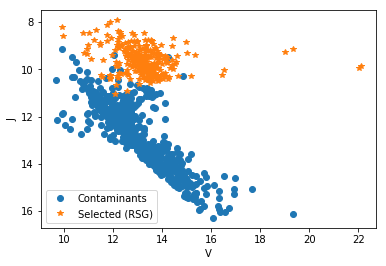

In [14]:
conts = np.where( ml_labels=='CON' )[0]
clasf = np.where( ml_labels!='CON' )[0]

plt.plot( ml_data_mags[conts][:,0], ml_data_mags[conts][:,1], 'o', 
             label='Contaminants')
plt.plot( ml_data_mags[clasf][:,0], ml_data_mags[clasf][:,1], '*', 
             label=f'Selected ({"+".join(class2keep)})')
plt.gca().invert_yaxis()

plt.xlabel(f'{bands_selected[0]}') #'-{bands_selected[1]}')
plt.ylabel(bands_selected[1])
plt.legend()
plt.show()


### Introducing train-test split

In supervised approaches we want to "teach" the algorithms what they need to learn, before start the predictions. In this case we want the SVM to identify the common properties of the two sub groups (SEL including all possible classes used, and CON as contaminants). However, if we provide all data the algorithm will learn this "by heart" and fit them perfectly (called **overfitting**), and when new data appear will probably misclassify. 

To address this, and to have a way to estimate the performance of the algorithms a standard **train-test split** it performed. As much data as possibly should enter the train sample, with typical values being 70-80%. Then, what is left is treated as a test sample, i.e. data that are not used to train the model. 

A better approach is to split the whole sample into **train**, **validation**, and **test** sets. In this way train set defines the model's parameters, while from the validation sample we can get the *hyperparameters* (those parameters whose values determine the learning process), and finally the test sample to evaluate the performance. We will see this and more advanced techniques to estimate performance in the next sessions (ML_Practices).



In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels, 
                        test_size=0.3, random_state=42) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (train)')
print(f'   {len(X_test)} (test)') 
print()
print(f'Test labels: {y_test}')




- From 926 sources:
   648 (train)
   278 (test)

Test labels: ['CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL'
 'SEL' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'CON' 'SEL' 'CON' 'CON' 'SEL'
 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'SEL' 'SEL'
 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'SEL' 'CON' 'SEL' 'SEL' 'CON' 'SEL'
 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'SEL' 'CON'
 'CON' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'CON' 'SEL'
 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON'
 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'CON' 'SEL'
 'CON' 'CON' 'CON' 'SEL' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON'
 'CON' 'SEL' 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'SEL' 'CON' 'SEL' 'SEL'
 'SEL' 'CON' 'SEL' 'SEL' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'SEL'
 'CON' 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'SEL' 'SEL' 'CON' 'CON' 'CON'
 'CON' 'CON' 'SEL' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 'CON' 

### Q. Play around with the test_size. 

but the best is the majority to be at training


In [16]:
from sklearn import metrics

clf = SVC(kernel='linear') #, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#print(y_pred)

print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

Classification report:

               precision    recall  f1-score   support

         CON       0.98      0.99      0.99       179
         SEL       0.98      0.97      0.97        99

    accuracy                           0.98       278
   macro avg       0.98      0.98      0.98       278
weighted avg       0.98      0.98      0.98       278

Confusion matrix: 

 [[177   2]
 [  3  96]]


### Model evaluation metrics

There is a number of assessment metrics for the performance of a classifier. We start by introducing the idea of the **confusion matrix**. 

<center>
<img src="images/confusion_matrix.png" width=800><br>
Figure 2. **Confusion matrix** for classification.<br></center>
(From [Precision vs Recall by Shruti Saxena](https://towardsdatascience.com/precision-vs-recall-386cf9f89488))
        


##### some more notes here :

Precision: (number of class over row) 
Recall: number of predictied class  over column  (the recovery rate of the population)

    (sensitivitiy, ... completeness, contamination)

In astrophysics we usually concentrate on **completeness** and **contamination** (see [this lik](http://connolly.github.io/introAstroML/blog/classification.html)):

$$completeness = \frac{True~Positives}{All~real~Positives} = \frac{True~Positives}{True~Positives + False~Negatives} = recall$$

$$contamination = \frac{False~Positives}{All~detected~Positives} = \frac{True~Positives}{True~Positives + False~Positives}$$

f1score = harmoic mean fo precision and recall .... 

macro / weighted avr : .... 

support : number of sources in test


A prettier presentation of the same results...

In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
                  
                  
    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, alpha=0.5)
#    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('# sources', fontsize=16)
    cbar.ax.tick_params(labelsize=16) # (fontsize=15)
   

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize=15)
        plt.yticks(tick_marks, target_names, fontsize=15)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center", color="black", fontsize=14 )
                     #color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center", color="black") 
#                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label (accuracy={:0.2f})'.format(accuracy, misclass), fontsize=16)
    plt.show()


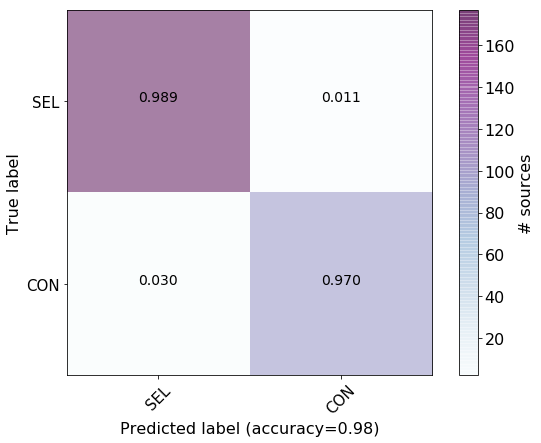

In [18]:
plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      ['SEL','CON'],
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=True  # True returns precent, False raw numbers
                      ) # YlOrBr


### Q. Questions to play with

- What happens if we start adding more classes into the selected one ?
- What happend when we change the kernel ?

### Plot the decision boundary

In [19]:

# conts = np.where( ml_labels=='CON' )[0]
# clasf = np.where( ml_labels!='CON' )[0]

# plt.plot( ml_data_mags[conts][:,0], ml_data_mags[conts][:,1], 'o', 
#              label='Contaminants')
# plt.plot( ml_data_mags[clasf][:,0], ml_data_mags[clasf][:,1], '*', 
#              label=f'Selected ({"+".join(class2keep)})')
# #plt.gca().invert_yaxis()

# plt.xlabel(f'{bands_selected[0]}')
# plt.ylabel(f'{bands_selected[1]}')
# plt.legend()

# # non-linear
# # xlim = (-2, 12)
# # ylim = (-1, 4)
# # xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 101), np.linspace(ylim[0], ylim[1], 101))
# # Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
# # Z = Z.reshape(xx.shape)
# # # Smooth the boundary:
# # from scipy.ndimage import gaussian_filter
# # Z = gaussian_filter(Z, 2)

# # ax.contour(xx, yy, Z, [0.5], colors='k')

# # linear
# w = clf.coef_[0]
# a = -w[0] / w[1]
# print(a)
# yy = np.arange(8,16,2)
# print(yy)
# xx = a * yy - clf.intercept_[0] / w[1]
# print(xx)
# plt.plot(xx, yy, '-k')

# # print(clf.coef_[0])

# #plt.show()


### 4.b. Multi-class problem

Now we approach the same problem as a multi-class one, i.e. we want to develop a classifier that can handle all classes simultaneously. (For this we repeat the above code with some small changes).


In [20]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [21]:
bands_selected = ['V', 'J', '36'] #, '36um', '58um'] 

In [22]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected,[])  

# stars with mags in: V,J,36
Type    initial    final 
-------------------------
OBA         370      280
OBAe         73       65
RSG         297      292
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      921


Now if we print the ml_labels the array is totally different and the multiclass output is evident immeditely.

In [23]:
print(ml_labels)

['OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA'
 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'OBA' 'O

### Splitting into train and test sets for multi-class

We are using again the train-test split approach but considering all classes now.

In [24]:
indices = np.arange(len(ml_labels))
X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels,
#                                shuffle=True, stratify=ml_labels, 
                                test_size=0.3 ) #, random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

print('\nStatistics per class:')
k = 0
for c in unique_cls:
    items_train = np.where( y_train==c )[0]
    items_test  = np.where( y_test==c )[0]
    items_total = np.where( ml_labels==c )[0]
    print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')



> From 921 sources we use 644 for training and 277 for testing.

Statistics per class:
> For OBA there are 280 sources split in 202 (train) and 78 (test) samples
> For OBAe there are 65 sources split in 50 (train) and 15 (test) samples
> For RSG there are 292 sources split in 192 (train) and 100 (test) samples
> For WR there are 76 sources split in 59 (train) and 17 (test) samples
> For YSG there are 208 sources split in 141 (train) and 67 (test) samples


### Q. Play around with the numbers of test_size - what do you notice ?

- run it as it is what do you notice? no objects for the test ??? 
- check the documentation and find out which parameters help... (TIP: add shuffle and/or stratify) 
- run a few times without stratify and check what is happening - do you get a class without any test? No? lower the test fraction  

Classification report:

               precision    recall  f1-score   support

         OBA       0.66      0.85      0.74        78
        OBAe       0.60      0.20      0.30        15
         RSG       0.97      0.94      0.95       100
          WR       0.42      0.29      0.34        17
         YSG       0.83      0.78      0.80        67

    accuracy                           0.79       277
   macro avg       0.69      0.61      0.63       277
weighted avg       0.79      0.79      0.78       277

Confusion matrix: 

 [[66  1  0  3  8]
 [ 8  3  0  4  0]
 [ 4  0 94  0  2]
 [ 9  1  1  5  1]
 [13  0  2  0 52]]


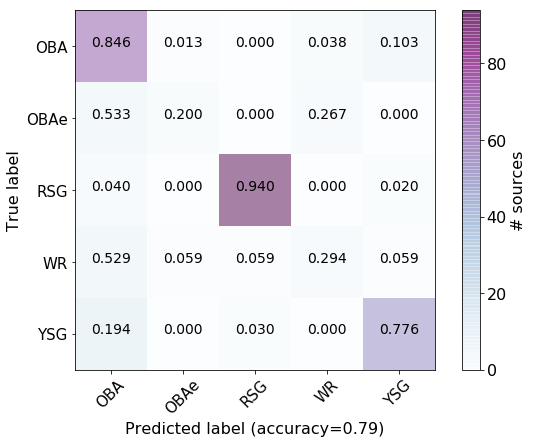

In [25]:
clf2 = SVC(kernel='rbf', gamma=20, class_weight='balanced')
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
#print(y_pred)

#confmatrix = metrics.confusion_matrix( y_test, y_pred)
print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      unique_cls,
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=True  # True returns precent, False raw numbers
                      ) # YlOrBr

### Q. What do you notice now? 

- what about the accuracy now? we see adrop but we try to classify more and more classes
- we see some classes getting mixed wih others...

## 5. Random Forests (RFs)

### 5.1. Decision Tree

A **Decision Tree** (**DT**) is simply a top-to-bottom tree-like structure where each node corresponds to a question (or a set of features more generally) that distinguishes objects to two groups, left and right from the node. A decision tree presents the drawback of learning extremely well the training set. That means that DTs overfit the data and they cannot predict very accurately new data.

![DT](images/DecisionTree.jpg)<br>
Figure 5.1: Quick introduction to Decition Trees - how to fulfill an everyday need.<br>
(Credit: G. Maravelias)

### 5.2. Random Forests

**Random Forests** (**RFs**) or Random Decision Trees ([Breiman (2001), Machine Learning, 45, 5](https://doi.org/10.1023/A:1010933404324)) is a generalization of the DTs, as it utilises a multitude of decision trees. When RFs are used as a classification (/regression) method, for each input datum the final output is the class (/value) given by the mode of the classes (/mean prediction) of the individual trees.

<img src="images/RandomForests.jpg" width=600>
<center>
    Figure 5.1. Schematic description of the Random Forests classifier.
    (Credit: G. Maravelias)
</center>


RFs create a large number of DTs through random selection of a subset of the training set as well as a random selection of features. This randomness reduces the correlation between the different DTs. Since the DTs have different conditions in their nodes and different overall structures, this diversity yield overall robust predictions. 

Once the RFs has been trained, a [unlabeled] datum to be classified is fed into all DTs of the forest. According to its properties and the nodes in each DT, it follows a specific path which leads to a given class. The final output of the RFs (the prediction) is an aggregation of all DTs by means of a majority vote.

The fact that RF combines the prediction for a number of individual trees makes it an **ensemble** method.

#### Read also: 
[Reis, Baron, & Shahaf (2019), AJ, 157, 16](https://ui.adsabs.harvard.edu/abs/2019ascl.soft03009R/abstract) provide an excellent description of RFs (for a two-class problem) and present a  robabilistic RFs method which takes into account the uncertainties on the data and their labels.

## 6. EXERCISE: Random Forest as a classifier

Using the same dataset we are not approaching the same problem using the Random Forest (both as a binary and a multiclass classifier).

In [26]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [27]:
class2keep_RF=['RSG']  # add any class if you want to use RF as binary classifier, or keep it []
bands_selected_RF = ['V', 'J', '36'] #, '36um', '58um'] 

In [28]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF, class2keep_RF)  

# stars with mags in: V,J,36
Type    initial    final 
-------------------------
OBA         370      280
OBAe         73       65
RSG         297      292
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      921
classifying:         292
contaminants:         629


In [29]:
indices = np.arange(len(ml_labels))
X_train, X_test, y_train, y_test = train_test_split(ml_data_mags, ml_labels,
#                                shuffle=True, stratify=ml_labels, 
                                test_size=0.3) #,  random_state=42) 

print(f'> From {len(ml_objects)} sources we use {len(X_train)} for training and {len(X_test)} for testing.') 

print('\nStatistics per class:')
k = 0
for c in unique_cls:
    items_train = np.where( y_train==c )[0]
    items_test  = np.where( y_test==c )[0]
    items_total = np.where( ml_labels==c )[0]
    print(f'> For {c} there are {len(items_total)} sources split in {len(items_train)} (train) and {len(items_test)} (test) samples')

> From 921 sources we use 644 for training and 277 for testing.

Statistics per class:
> For OBA there are 0 sources split in 0 (train) and 0 (test) samples
> For OBAe there are 0 sources split in 0 (train) and 0 (test) samples
> For RSG there are 0 sources split in 0 (train) and 0 (test) samples
> For WR there are 0 sources split in 0 (train) and 0 (test) samples
> For YSG there are 0 sources split in 0 (train) and 0 (test) samples


Classification report:

               precision    recall  f1-score   support

         CON       0.97      0.98      0.98       183
         SEL       0.97      0.95      0.96        94

    accuracy                           0.97       277
   macro avg       0.97      0.97      0.97       277
weighted avg       0.97      0.97      0.97       277

Confusion matrix: 

 [[180   3]
 [  5  89]]


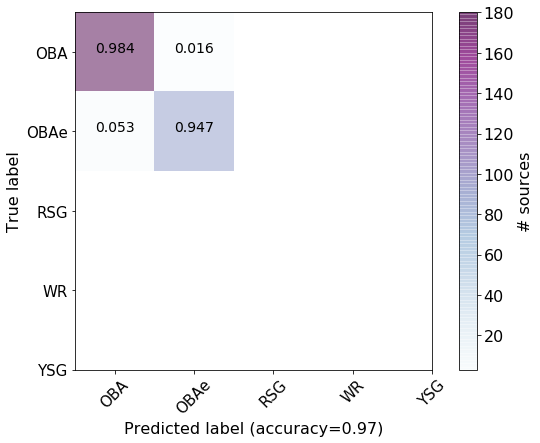

In [30]:
from sklearn.ensemble import RandomForestClassifier

clfrf = RandomForestClassifier()
clfrf.fit(X_train, y_train)
y_pred = clfrf.predict(X_test)

print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")

plot_confusion_matrix( metrics.confusion_matrix( y_test, y_pred),
                      unique_cls, # or class2keep_RF for binary mode
                      title='Confusion matrix', cmap='BuPu', # for more options see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
                      normalize=True  # True returns percent, False raw numbers
                      ) # YlOrBr

### Q:  Why the algorithm performance changes when re-running it with the same setup?

[+] click to discover

[//]: # "
The small size of the sample introduces a certain degree of randomness when splitting it into train and validation sub-sets.
"

### Q:  What is the difference on the accuracy of the algorithm if we use the magnitudes directly instead of their differences ? 

### Explore performance

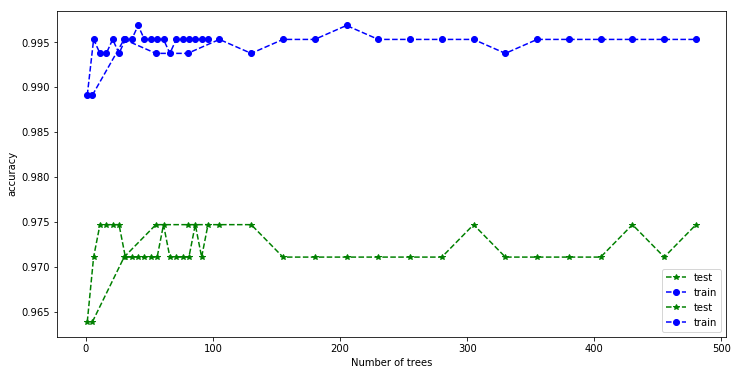

In [32]:
from sklearn.metrics import accuracy_score


accuracies_train = []
accuracies  = []
recalls     = []
num_trees = np.arange(1,100,5) #[1, 3, 10] # k values to be used

for trs in num_trees:
    clftt = RandomForestClassifier(n_estimators=trs, max_depth=5)
    clftt.fit(X_train, y_train)
    y_pred = clftt.predict(X_test)
    t_pred = clftt.predict(X_train)
    
    accuracies.append(accuracy_score( y_test, y_pred))
    accuracies_train.append(accuracy_score( y_train, t_pred))
#    recalls.append(recall_score(y_test, y_pred, labels=unique_cls, average='weighted') )

# print(accuracies)
# print(recalls)

fig = plt.figure(figsize=(12,6))

plt.plot(num_trees, accuracies, '--*', c='g', label='test')
plt.plot(num_trees, accuracies_train, '--o', c='b', label='train')
plt.xlabel('Number of trees')
plt.ylabel('accuracy')

if clftt.max_depth!=None:
    plt.plot(num_trees*clftt.max_depth, accuracies, '--*', c='g', label='test')
    plt.plot(num_trees*clftt.max_depth, accuracies_train, '--o', c='b', label='train')


plt.legend()
plt.show()

In [ ]:
if clftt.max_depth!=None:
    plt.plot(num_trees*clftt.max_depth, accuracies, '--*', c='g', label='test')
    plt.plot(num_trees*clftt.max_depth, accuracies_train, '--o', c='b', label='train')


plt.legend()
plt.show()

### 5.4. Final remarks on Random Forests

In machine learning most of the effort is actually spent on the **sample** selection and, most importantly, on the selection of the **features** used for the classification (feature engineering).

RFs partially overcome the latter problem by training each DT on a different sub-set of features, hence training the algorithm to recognize the features which mostly differentiate the objects.

In [ ]:
For a real application of this idea see Maravelias 

In [ ]:
not all CONS and PROS for all classifier... 
try more... 

Q: what do you think are the pros and cons in these three classifiers ???

## Bonus method - $k$-Nearest Neighbors (KNN) classification

Looking at the scatter plots, we find two blobs corresponding to the different classes. Our mind uses the proximity of the points to form a "mental boundary region" (in a _discriminative classification_ fashion). In this specific case we can try to automate of the procedure, as well as the extension to arbitrary number of dimensions, by mimicking the human behaviour, i.e. by:

> attributing a given point to the class that dominates its surroundings.

The problem is then how to define the "neighborhood" of a point. The trivial solution would be to set a fixed radius. The issue then becomes its size: if too small, we **will not find neighbors** for "satellite" points at the edge of a class cluster; if too large, we **will lose resolution** in dense parts, effectively throwing away information. Therefore, ideally we would like to have a *variable bandwidth* selection threshold.

> One solution is to use a local average of the labels of the $k$ nearest neighbors:
>
> $y = \frac{1}{k} \sum￼_{x_i \in N_k(x)} y_{i}$
>
> where N_k(x) is the neighborhood around $x_i$

In this way the classification _is not_ defined based on the distance on the parameter graph, but is rather scale-independent.

Let's see a 2D example. We got two parameters and training data that are classified as being *red* or *blue*. The question is how do we classify a new (_i.e. not part of the training set_) point? The following images are taken from [here](https://importq.wordpress.com/2017/11/24/mnist-analysis-using-knn/) (we edited the the first one).

### Animated example

<table><tr>
    <td width=400>
        <img src="images/knn_neigh_initial.jpg">
        <center>Figure 3.1.a. Training data already possessing a _red_ or _blue_ label, and an arbitrary new point to be classified.</center>
    </td>    
    <td width=400>
        <img src="images/knn_neigh.gif">
        <center>Figure 3.1.b. Classification using majority votes of $k$ neighbors, fordifferent values of $k$.</center>
    </td>
    <td width=400>
        <img src="images/knn_neigh_mult.gif">
        <center>Figure 3.1.c. For a fixed $k$, the **model** can be thought as of a function of the location in the parameter space. Note that the appearing dots are _not_ part of the training set. Instead, they represent the predicted classifications **if** the new point would fall on that position.</center>
    </td>
</tr></table>

The panels *a* and *b* already suggest that the KNN classification will be affected by the choice of the **hyperparameter** $k$: we will address this issue later on.

### EXERCISE: apply $k$-NN as a classifier

In [33]:
reminder()

Available bands to use: 
U,B,V,I,J,H,K,36,45,58,80,24
-------------------------
Available classes to use:
OBA,OBAe,RSG,WR,YSG


In [34]:
class2keep_KNN=['RSG']  # add any class if you want to use RF as binary classifier, or keep it []
bands_selected_KNN = ['V', 'J', '36'] #, '36

In [35]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_KNN, class2keep_KNN) 

# stars with mags in: V,J,36
Type    initial    final 
-------------------------
OBA         370      280
OBAe         73       65
RSG         297      292
WR           91       76
YSG         208      208
------------------------
TOTAL:     1039      921
classifying:         292
contaminants:         629


In [36]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(ml_data_clrs, ml_labels, 
                        stratify = ml_labels,
                        test_size=0.3, random_state=42) 

print(f'- From {len(ml_objects)} sources:')
print(f'   {len(X_train)} (train)')
print(f'   {len(X_test)} (test)') 


#print(y_pred)

- From 921 sources:
   644 (train)
   277 (test)


In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# PERFORM CLASSIFICATION FOR VARIOUS VALUES OF k

# for each 'k', store the classifier and predictions on test sample
classifiers = []
predictions = []
accuracies  = []
recalls     = []
kvals = np.arange(1,20,1) #[1, 3, 10] # k values to be used

classifiers, predictions = [], []
print(classifiers, predictions)

for k in kvals:
# trying different k hyperparameters

#     # for each k, we will use between 1 and 4 colors (1D to 4D) to classify the sources
    
#         clf = KNeighborsClassifier(n_neighbors=k) # define the classifier, in this case KNN with hyperparameter k
#         clf.fit(X_train[:, :nc], y_train)         # fit training set
#         y_pred = clf.predict(X_test[:, :nc])      # predict class of test set

#         classifiers[-1].append(clf)
#         predictions[-1].append(y_pred)

    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    #print(y_pred)
    
    classifiers.append(KNN)
    predictions.append(y_pred)
    accuracies.append(accuracy_score( y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, pos_label='SEL') )

    print(f"Classification report:\n\n {metrics.classification_report(y_test, y_pred)}") 
    print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, y_pred)}")
    
    
    

[] []
Classification report:

               precision    recall  f1-score   support

         CON       0.96      0.97      0.97       189
         SEL       0.94      0.91      0.92        88

    accuracy                           0.95       277
   macro avg       0.95      0.94      0.95       277
weighted avg       0.95      0.95      0.95       277

Confusion matrix: 

 [[184   5]
 [  8  80]]
Classification report:

               precision    recall  f1-score   support

         CON       0.93      0.98      0.96       189
         SEL       0.96      0.84      0.90        88

    accuracy                           0.94       277
   macro avg       0.95      0.91      0.93       277
weighted avg       0.94      0.94      0.94       277

Confusion matrix: 

 [[186   3]
 [ 14  74]]
Classification report:

               precision    recall  f1-score   support

         CON       0.96      0.98      0.97       189
         SEL       0.95      0.92      0.94        88

    accuracy 

[0.9530685920577617, 0.9386281588447654, 0.9602888086642599, 0.9602888086642599, 0.9638989169675091, 0.9602888086642599, 0.9566787003610109, 0.9638989169675091, 0.9638989169675091, 0.9638989169675091, 0.9638989169675091, 0.9530685920577617, 0.9711191335740073, 0.9675090252707581, 0.9638989169675091, 0.9675090252707581, 0.9602888086642599, 0.9602888086642599, 0.9711191335740073]
[0.9090909090909091, 0.8409090909090909, 0.9204545454545454, 0.9204545454545454, 0.9318181818181818, 0.9204545454545454, 0.9204545454545454, 0.9204545454545454, 0.9204545454545454, 0.9204545454545454, 0.9431818181818182, 0.9090909090909091, 0.9659090909090909, 0.9431818181818182, 0.9545454545454546, 0.9431818181818182, 0.9431818181818182, 0.9318181818181818, 0.9659090909090909]



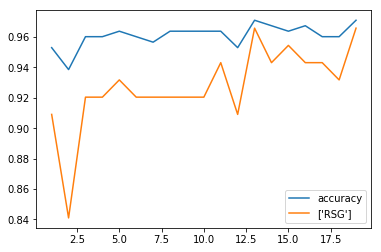

In [38]:
print(accuracies)

print(recalls)

print()

nn = [ clasf.n_neighbors for clasf in classifiers]

plt.plot(nn, accuracies, label='accuracy')
plt.plot(nn, recalls, label=class2keep)

plt.legend()
plt.show()